<a href="https://colab.research.google.com/github/RishabhSub/Forecasting_1/blob/main/Copy_of_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1
Instructions:
- Please read the project description before your start.
- To download a copy of your ipython notebook: click ```File -> Download .ipyhon```
- Write your code in the code cells below each Step description. You may add extra cells if needed.

In [ ]:
# Run this cell as the first step to make sure we use the most updated version of statsmodels in python
# If it fails to import the latest version, try click Runtime -> Restart runtime and start from here again
# !pip uninstall statsmodels==0.12.0
# !pip install numpy scipy patsy pandas
!pip install statsmodels==0.12.0
import statsmodels

     |████████████████████████████████| 9.5MB 5.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats import diagnostic
from statsmodels.stats import stattools as st

## Question 1: model and forecat electricity consumption data
Step 1: import data from Github
- Check to see that DataFrame elec has two columns ```date``` and ```elec```
- The variable ```elec``` is electricity retail sales to the residential sector in the US in million kilowatt hours.
- The sample is monthly and covers the period from 1973M1 to 2011M12 but use the sample up to **2010M12** (do not include observations from 2011)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/elec.csv')
df.index = pd.date_range(start='1973-01-01', periods= df.shape[0], freq='M')

# Define start and end date of sample
start = '1973-01-01'
end = '2010-12-31' 

Step 2: determine whether it is better to take the log of electricity consumption or not. Plot the level or the log of electricity consumption depending on your choice. Properly label the x- and y- axis in your plot

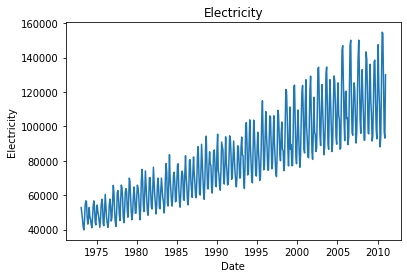

In [ ]:
plt.plot(df['elec'][start:end])
# Plots the sample from 'start' - 'end' dates as defined ('end' date exclusive)
ax = plt.gca()
ax.set_ylabel('Electricity')
ax.set_xlabel('Date')
plt.title('Electricity')
plt.show()

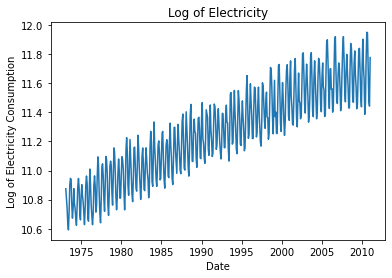

In [ ]:
df['log_elec'] = np.log(df['elec'])

plt.plot(df['log_elec'][start:end])
ax = plt.gca()
ax.set_ylabel('Log of Electricity Consumption')
ax.set_xlabel('Date')
plt.title('Log of Electricity')
plt.show()

Step 3: Estimate a model with a linear trend and a model with a quadratic trend. Which one would you choose?

In [ ]:
df['constant'] = 1

df['time'] = np.arange(df.shape[0])+1
df['time2'] = df['time']**2

# Linear trend model
df['date'] = np.arange(df.shape[0])+1
 
Y = df['log_elec'][start:end]
X_linear = df[['constant','date']][start:end]
 
result_linear = sm.OLS(Y,X_linear, missing='drop').fit()
print(result_linear.summary())

# Quadratic trend model
Y = df['log_elec'][start:end]
X_quadratic = df[['constant','time','time2']][start:end]

# sm.OLS(Y,X_quadratic) regresses Y on regressors in X_quadratic
quad_result = sm.OLS(Y,X_quadratic, missing='drop').fit() # this is the name of the model we chose in step 3
print(quad_result.summary())

                            OLS Regression Results                            
Dep. Variable:               log_elec   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     821.5
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           3.20e-97
Time:                        15:15:12   Log-Likelihood:                 182.83
No. Observations:                 384   AIC:                            -361.7
Df Residuals:                     382   BIC:                            -353.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      10.8117      0.021    523.138      0.0

Step 4: Depending on your choice of the model from Step 3, provide the plot and correlogram (up to 12 lags) of the residuals of the model you chose in Step 3.  Is there any seasonal pattern?

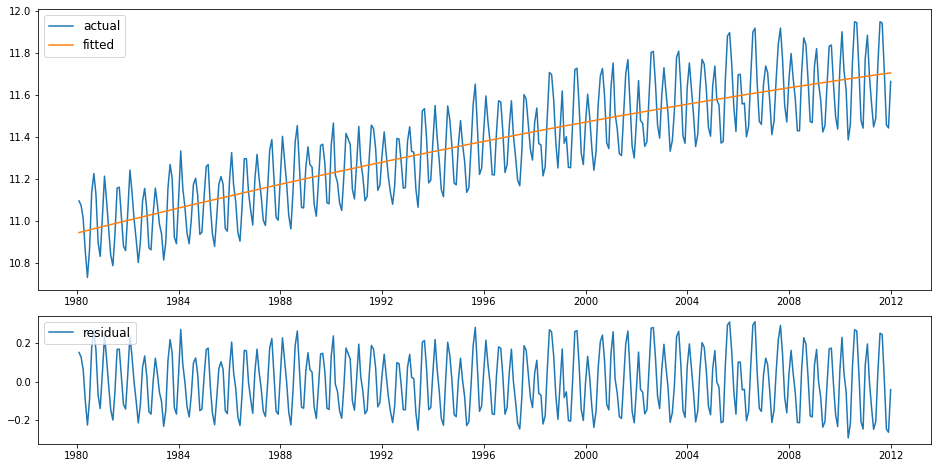

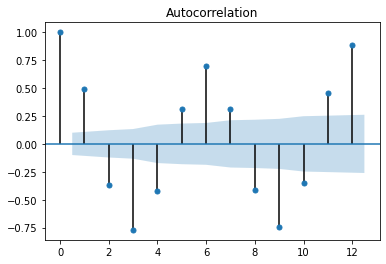

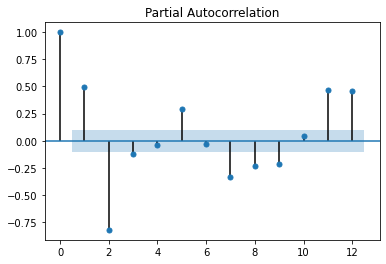

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)
ax1.plot(Y, label = 'actual')
ax1.plot(quad_result.fittedvalues, label = 'fitted')
 
ax2.plot(quad_result.resid, '-',label='residual')
 
ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')
plt.show()

plot_acf(quad_result.resid, lags=12)
plot_pacf(quad_result.resid, lags=12)
plt.show()

# If we only want to plot residuals
# plt.plot(result_quadratic.resid)
# ax = plt.gca()
# ax.set_ylabel('Residual from quadratic trend model', fontsize = 'small')
# ax.set_xlabel('date', fontsize = 'x-large')
# plt.show()

Step 5: Estimate a model with a trend and a full set of dummy variables (for 12 months) and report the result.

In [ ]:
df['month'] = pd.DatetimeIndex(df.index).month
dummy = pd.get_dummies(df['month'], prefix='m')
 
df_elec = pd.concat([df,dummy], axis=1)
print(df_elec)
 
Y = df_elec['log_elec'][start:end]
X_season = df_elec[['time','time2','m_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']][start:end]

result_season = sm.OLS(Y, X_season, missing='drop').fit()
print(result_season.summary())

               date        elec   log_elec  constant  ...  m_9  m_10  m_11  m_12
1973-01-31  1973M01   52840.231  10.875028         1  ...    0     0     0     0
1973-02-28  1973M02   49601.308  10.811772         1  ...    0     0     0     0
1973-03-31  1973M03   46314.971  10.743221         1  ...    0     0     0     0
1973-04-30  1973M04   41820.951  10.641153         1  ...    0     0     0     0
1973-05-31  1973M05   39824.999  10.592250         1  ...    0     0     0     0
...             ...         ...        ...       ...  ...  ...   ...   ...   ...
2011-08-31  2011M08  153738.608  11.943009         1  ...    0     0     0     0
2011-09-30  2011M09  122719.626  11.717658         1  ...    1     0     0     0
2011-10-31  2011M10   94585.064  11.457255         1  ...    0     1     0     0
2011-11-30  2011M11   93220.237  11.442720         1  ...    0     0     1     0
2011-12-31  2011M12  116341.274  11.664283         1  ...    0     0     0     1

[468 rows x 19 columns]
   

Step 6: Provide  the  plot  and  correlogram  (up  to  12  lags)  of  the  residuals  of  the  model  you estimated in Step 5. Is there any cycles or serial correlation in the residuals?

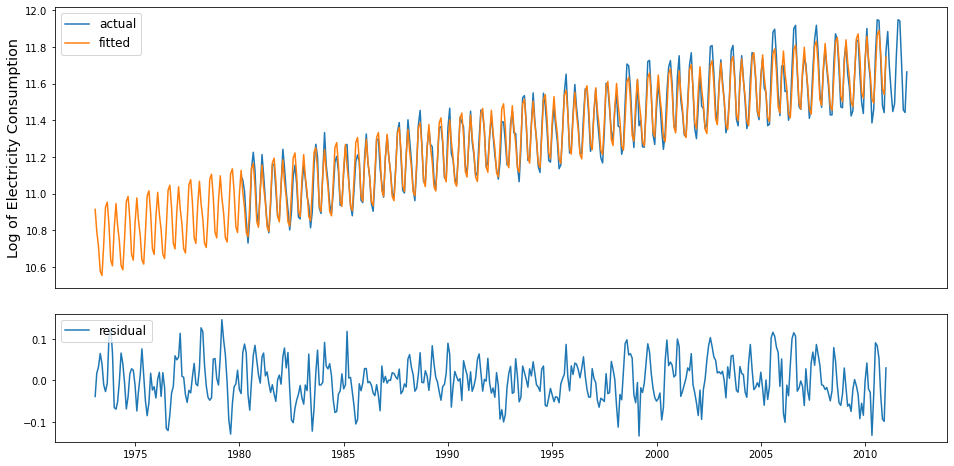

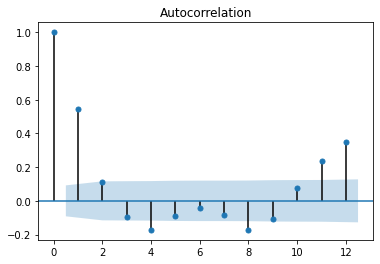

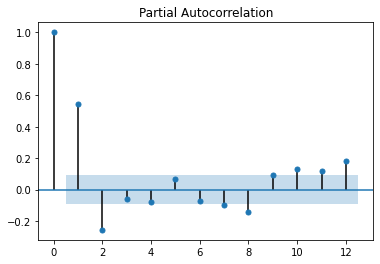

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)
 
ax1.plot(Y, label = 'actual')
ax1.plot(result_season.fittedvalues, label = 'fitted')
 
ax2.plot(result_season.resid, '-',label='residual')
 
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('Log of Electricity Consumption', fontsize = 'x-large')
 
ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')
plt.show()

# Correlogram
plot_acf(result_season.resid, lags=12)
plot_pacf(result_season.resid, lags=12)
plt.show()

Step 7: Estimate an ARMA(p,q) model with $p= 0,1,2,3$ and $q= 0,1,2,3$ except $p=q=0$ and report SICs. Which lag orders would you choose?

In [ ]:
start = '1973-01-01'
end = '2010-12-31'
# Do this for every p and q value in ARMA
# results3_3 = ARIMA(Y, order=(1,0,1), trend='n', exog=X_season).fit()
# print(results3_3.summary())
# results3_3 = ARIMA(Y, order=(1,0,2), trend='n', exog=X_season).fit()
# print(results3_3.summary())
# results3_3 = ARIMA(Y, order=(1,0,2), trend='n', exog=X_season).fit()
# print(results3_3.summary())
results2_1 = ARIMA(Y, order=(2,0,1), trend='n').fit()
print(results2_1.summary()) # This model had the lowest BIC value, so we chose this model
# results3_3 = ARIMA(Y, order=(2,0,2), trend='n', exog=X_season).fit()
# print(results3_3.summary())
# results3_3 = ARIMA(Y, order=(2,0,3), trend='n', exog=X_season).fit()
# print(results3_3.summary())
# results3_3 = ARIMA(Y, order=(3,0,1), trend='n', exog=X_season).fit()
# print(results3_3.summary())
# results3_3 = ARIMA(Y, order=(3,0,2), trend='n', exog=X_season).fit()
# print(results3_3.summary())
# results3_3 = ARIMA(Y, order=(3,0,3), trend='n', exog=X_season).fit()
# print(results3_3.summary()) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               log_elec   No. Observations:                  384
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 179.603
Date:                Sat, 27 Mar 2021   AIC                           -351.206
Time:                        16:04:59   BIC                           -335.404
Sample:                    01-31-1980   HQIC                          -344.938
                         - 12-31-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1441      0.082      1.756      0.079      -0.017       0.305
ar.L2          0.8543      0.082     10.415      0.000       0.694       1.015
ma.L1          0.9582      0.024     39.762      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Step 8: Provide the plot and correlogram (up to 12 lags) of the residuals of the model you chose in Step 7.  Is there any evidence of cycles in the residuals?

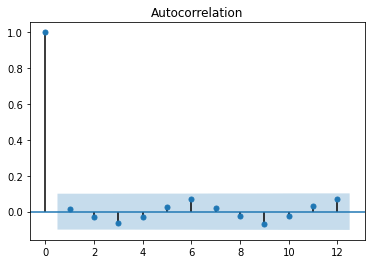

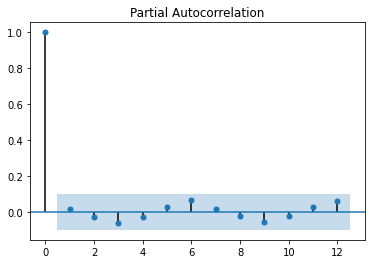

In [ ]:
plot_acf(results2_1.resid, lags = 12)
plot_pacf(results2_1.resid, lags = 12)
plt.show()

Step 9: Use  the  model  you  chose  in  Step 7,  forecast  the level  of  electricity  retail  sales  for year 2011 and compute its 95% interval forecasts as well. Plot your point and interval forecasts together with actual data for the period from 2008 to 2011.

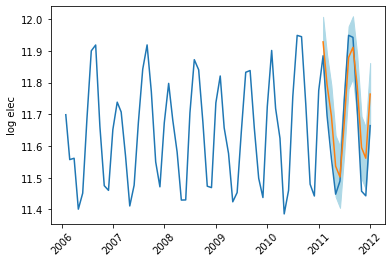

In [ ]:
forecast_start = '2011-01-01'
forecast_end = '2012-01-01'

x_exog = df_elec[['time','time2','m_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']][forecast_start:forecast_end]
forecast = results2_1.get_forecast(12, exog = x_exog)
mean_forecast = forecast.predicted_mean
confidence_interval = forecast.conf_int()

plt.plot(df['log_elec']['2006-01-01':'2011-12-31'])
plt.plot(df.index[-12:], mean_forecast.values)
ax = plt.gca()
ax.tick_params(axis = 'x', rotation = 45)
ax.set_ylabel('log elec')

plt.fill_between(df.index[-12:], 
                 confidence_interval['lower log_elec'], 
                 confidence_interval['upper log_elec'], 
                 color = 'lightblue')

plt.show()

#Question 2: model and forecat industrial production data
Step 1: import data from Github

- Check to see that DataFrame ```industrial``` has two columns ```date``` and ```lip```
- The variable ```lip``` is the log of the seasonally adjusted industrial production index of the US ($ip=100$ in 2007).
- The sample is monthly and covers the period from 1980M1 to 2014M12 but use the sample up to 2013M12 (do not include observations in 2014).

In [ ]:
ind = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/industrial.csv')
ind.index = pd.date_range(start='1980-01-01', periods= ind.shape[0], freq='M')

# Define start and end date of sample
start = '1980-01-01'
end = '2013-12-31' 

ind

,date,lip
1980-01-31,1980-01,3.947828
1980-02-29,1980-02,3.948399
1980-03-31,1980-03,3.945204
1980-04-30,1980-04,3.924767
1980-05-31,1980-05,3.900220
...,...,...
2014-08-31,2014-08,4.648722
2014-09-30,2014-09,4.656172
2014-10-31,2014-10,4.655174
2014-11-30,2014-11,4.666533


Step 2: Estimate a model with the intercept and a linear time trend and report the estimation result

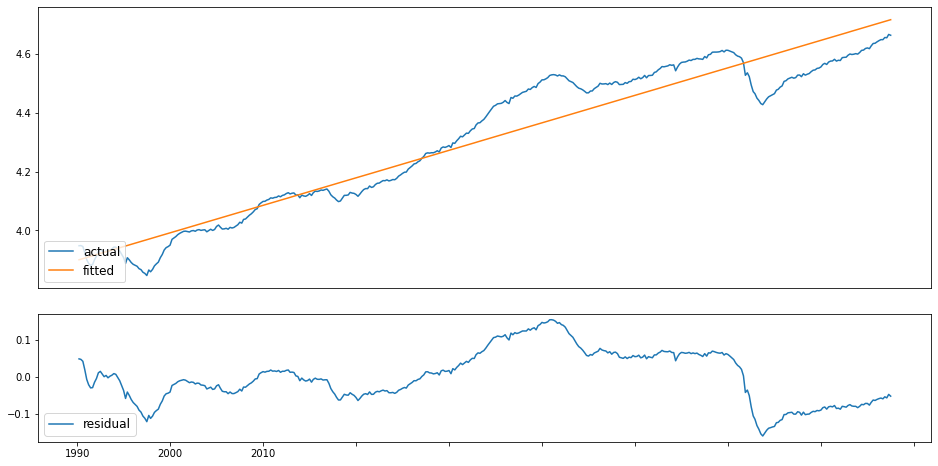

In [ ]:
ydata = ind['lip']

ind['constant'] = 1
ind['trend'] = np.arange(ind.shape[0])
X = ['constant', 'trend']
Y = ['lip']
result = sm.OLS(ind[Y],ind[X]).fit()

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

y_fit = result.fittedvalues
residual = ydata - y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='lower left', fontsize = 'large')
ax2.legend(loc='lower left', fontsize = 'large')

# ax1.set_xticks(['1980-01-31','1990-01-01', '2000-02-01', '2010-02-01'])
ax1.set_xticklabels(['1980', '1990', '2000', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

plt.show()

Step 3: Compute the correlogram of the residuals in Step 2 up to 12 lags and describe any interesting characteristics. Would an AR model or an MA model fit the data better?

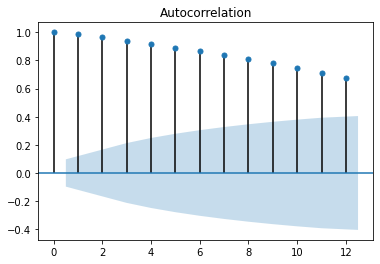

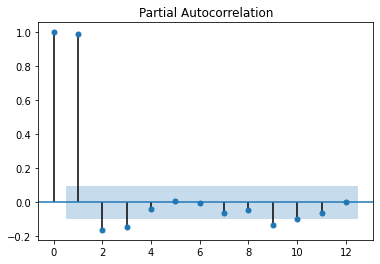

In [ ]:
ind['date'] = np.arange(ind.shape[0])+1
ind['date2'] = ind['date']**2

Y = ind['lip'][start:end]
X_quadratic = ind[['constant','date','date2']][start:end]

result_quadratic = sm.OLS(Y,X_quadratic, missing='drop').fit()
# print(result_quadratic.summary())

plot_acf(result_quadratic.resid, lags=12)
plot_pacf(result_quadratic.resid, lags=12)
plt.show()

Step 4: Estimate an AR model, including the intercept and a linear time trend, with 1, 2, ..., 6 lags and report SICs of all these models. 

In [ ]:
# ar1_model = ARIMA(ind['lip'], order = (1,0,0))
# ar1_results = ar1_model.fit()
# print(arma_results.summary())

# ar2_model = ARIMA(ind['lip'], order = (2,0,0))
# ar2_results = ar2_model.fit()
# print(arma_results.summary())

# ar3_model = ARIMA(ind['lip'], order = (3,0,0))
# ar3_results = ar3_model.fit()
# print(arma_results.summary())

ar4_model = ARIMA(ind['lip'], order = (4,0,0))
ar4_results = ar4_model.fit()
print(ar4_results.summary()) # This had the lowest BIC value

# ar5_model = ARIMA(ind['lip'], order = (5,0,0))
# ar5_results = ar5_model.fit()
# print(arma_results.summary())

# ar6_model = ARIMA(ind['lip'], order = (6,0,0))
# ar6_results = ar6_model.fit()
# print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                    lip   No. Observations:                  420
Model:                 ARIMA(4, 0, 0)   Log Likelihood                1528.278
Date:                Fri, 26 Mar 2021   AIC                          -3044.556
Time:                        22:59:01   BIC                          -3020.314
Sample:                    01-31-1980   HQIC                         -3034.975
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3084      0.157     27.361      0.000       4.000       4.617
ar.L1          1.1692      0.032     37.028      0.000       1.107       1.231
ar.L2          0.0709      0.068      1.039      0.2

Step 5: Choose the lag length for an AR model based on SIC and report the estimation result of the AR model with the chosen lag length.  Check out the ```Durbin-Watson``` statistic.  What doesthe DW statistic suggest?

In [ ]:
st.durbin_watson(ar4_results.resid)

1.1179360945912538

Step 6: Now use the model chosen in Step 5. Consider the correlogram of the residuals up to 12 lags. Is there any evidence of serial correlation in the residuals?

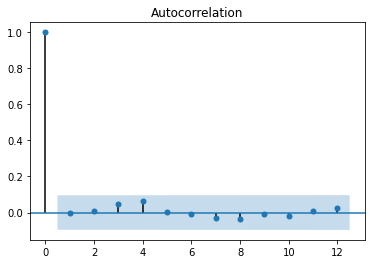

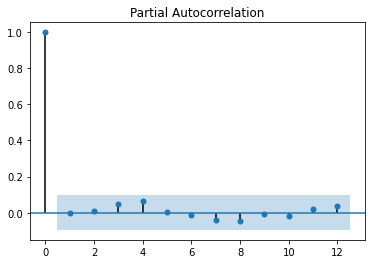

In [ ]:
plot_acf(ar4_results.resid, lags = 12)
plot_pacf(ar4_results.resid, lags = 12)
plt.show()

Step 7: Use the model chosen in Step 5. Do the ```Breusch-Godfrey``` test (serial correlation LM test) on the residuals with 6 lags included.  Do you reject the null hypothesis at the 5% significance level?

In [ ]:
bgtest = diagnostic.acorr_breusch_godfrey(result_quadratic, nlags = 12)
print(bgtest[0])
print(bgtest[1])


396.22063360373664
2.388805665703921e-77


Step 8: The Great Recession made industrial production drop substantially in 2008 and 2009. Do you think the model chosen in Step 5 became invalid to describe the dynamics ofthe industrial production after the Great Recession?  Try to provide some evidence for your conclusion using appropriate statistics. 

In [ ]:
predict_1 = ar4_results

Step 9: Forecast the **level** of the industrial production for year 2014 and compute its 95% interval forecasts as well. Plot your point and interval forecasts together with actual data forthe period from 2010 to 2014.



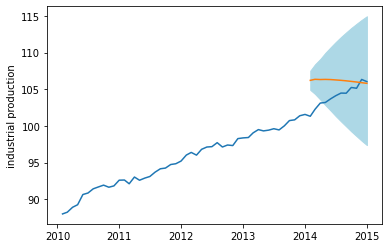

In [ ]:
start = '2014-01-01'
end = '2015-01-01'

forecast = ar4_results.get_forecast(12)
mean_forecast = np.exp(forecast.predicted_mean)
confidence_interval = np.exp(forecast.conf_int())
ind['ip'] = np.exp(ind['lip'])

plt.plot(ind['ip']['2010-01-01':'2015-01-01'])
plt.plot(ind.index[-12:], mean_forecast.values)
ax = plt.gca()
ax.tick_params(axis = 'x')
ax.set_ylabel('industrial production')
plt.fill_between(ind.index[-12:], 
                 confidence_interval['lower lip'], 
                 confidence_interval['upper lip'],
                 color = 'lightblue')

plt.show()
